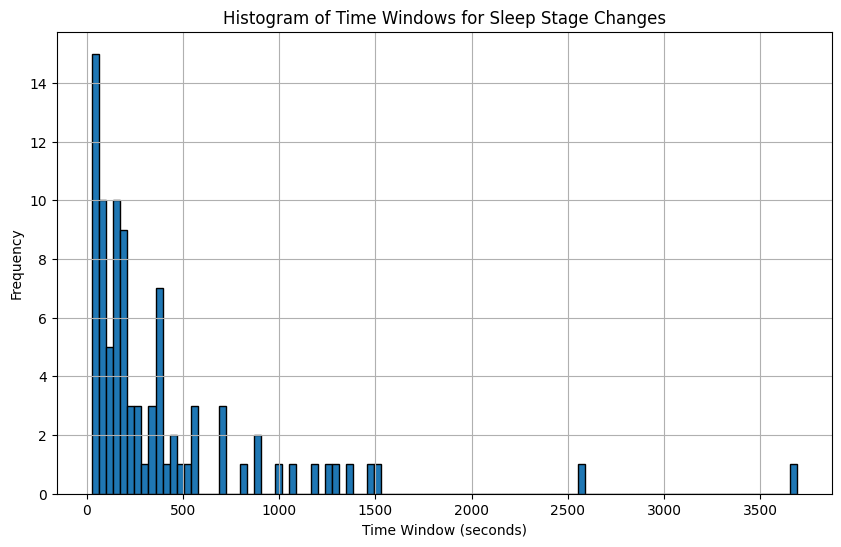

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = 'c:/Users/anany/Desktop/OSA/severe_csvs/EOG LOC-A2.csv'
df = pd.read_csv(file_path)

# Identify the time points where the sleep stage changes
sleep_stage_changes = df['user sleep stage'].ne(df['user sleep stage'].shift()).cumsum()

# Calculate the time windows between these changes
time_windows = df.groupby(sleep_stage_changes)['time'].apply(lambda x: x.max() - x.min()).values

# Plot a histogram of the time windows
plt.figure(figsize=(10, 6))
plt.hist(time_windows, bins=100, edgecolor='black')
plt.title('Histogram of Time Windows for Sleep Stage Changes')
plt.xlabel('Time Window (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [3]:
import numpy as np

min_window = np.min(time_windows)  # Absolute minimum
quantile_window = np.percentile(time_windows, 5)  # 5th percentile
print(f"Minimum Window: {min_window} seconds, Quantile Window: {quantile_window} seconds")

Minimum Window: 29.0 seconds, Quantile Window: 29.0 seconds


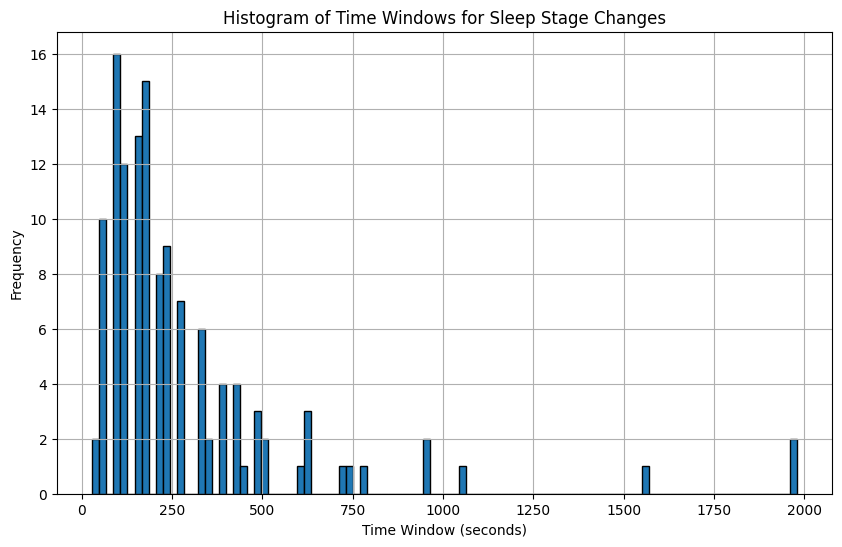

Minimum Window: 29.0 seconds, Quantile Window: 59.0 seconds


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = 'c:/Users/anany/Desktop/OSA/mild_csvs/EOG LOC-A2.csv'
df = pd.read_csv(file_path)

# Identify the time points where the sleep stage changes
sleep_stage_changes = df['user sleep stage'].ne(df['user sleep stage'].shift()).cumsum()

# Calculate the time windows between these changes
time_windows = df.groupby(sleep_stage_changes)['time'].apply(lambda x: x.max() - x.min()).values

# Plot a histogram of the time windows
plt.figure(figsize=(10, 6))
plt.hist(time_windows, bins=100, edgecolor='black')
plt.title('Histogram of Time Windows for Sleep Stage Changes')
plt.xlabel('Time Window (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import numpy as np

min_window = np.min(time_windows)  # Absolute minimum
quantile_window = np.percentile(time_windows, 5)  # 5th percentile
print(f"Minimum Window: {min_window} seconds, Quantile Window: {quantile_window} seconds")

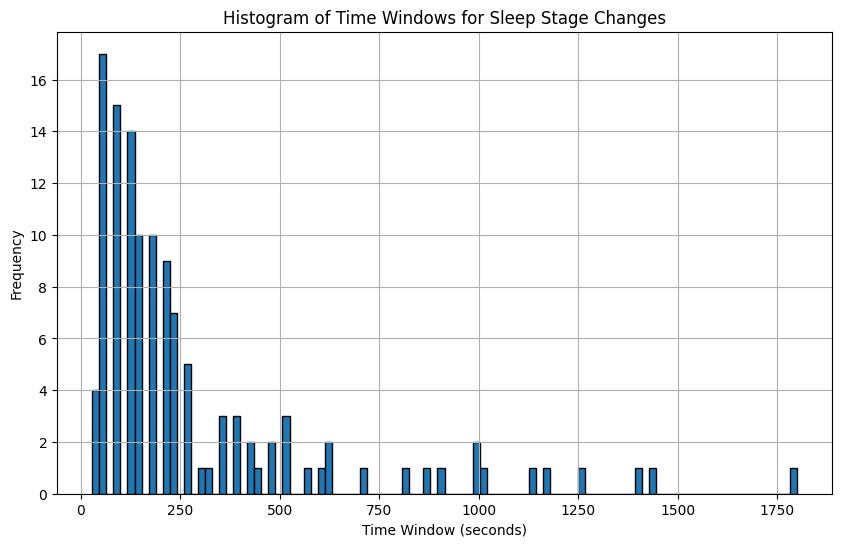

Minimum Window: 29.0 seconds, Quantile Window: 59.0 seconds


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = 'c:/Users/anany/Desktop/OSA/moderate_csvs/EOG LOC-A2.csv'
df = pd.read_csv(file_path)

# Identify the time points where the sleep stage changes
sleep_stage_changes = df['user sleep stage'].ne(df['user sleep stage'].shift()).cumsum()

# Calculate the time windows between these changes
time_windows = df.groupby(sleep_stage_changes)['time'].apply(lambda x: x.max() - x.min()).values

# Plot a histogram of the time windows
plt.figure(figsize=(10, 6))
plt.hist(time_windows, bins=100, edgecolor='black')
plt.title('Histogram of Time Windows for Sleep Stage Changes')
plt.xlabel('Time Window (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import numpy as np

min_window = np.min(time_windows)  # Absolute minimum
quantile_window = np.percentile(time_windows, 5)  # 5th percentile
print(f"Minimum Window: {min_window} seconds, Quantile Window: {quantile_window} seconds")

# RANDOM FOREST TESTING ON MILD CSV

In [6]:
from scipy.signal import windows

def make_reconstructed_fft(signal, sampling_rate):
    window = windows.hann(len(signal))
    windowed_signal = signal * window
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/sampling_rate)
    magnitude_spectrum = np.abs(fft_result)
    fft_filtered = np.copy(fft_result)
    fft_filtered[20:] = 0
    reconstructed_fft = np.fft.ifft(fft_filtered).real
    return reconstructed_fft

def get_fft_coefficients(signal, sampling_rate):
    window = windows.hann(len(signal))
    windowed_signal = signal * window
    fft_result = np.fft.fft(windowed_signal)
    freq = np.fft.fftfreq(len(windowed_signal), 1/sampling_rate)
    magnitude_spectrum = np.abs(fft_result)
    return fft_result, freq, magnitude_spectrum

In [7]:
def thresholding(signal, threshold):
    mean = signal.mean()
    std = np.std(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, mean)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

In [8]:
import pandas as pd
import numpy as np

eeg_mild_path = 'c:/Users/anany/Desktop/OSA/mild_csvs/EEG O1-A2.csv'
eeg_mild_df = pd.read_csv(eeg_mild_path)
eeg_mild_signal = eeg_mild_df['signal']
eeg_mild_128hz = resample_signal(thresholding(eeg_mild_signal, 2), len(eeg_mild_signal)*128)
reconstructed_eeg_mild_128hz = make_reconstructed_fft(eeg_mild_128hz, 128)

In [9]:
eog_mild_path = 'c:/Users/anany/Desktop/OSA/mild_csvs/EOG LOC-A2.csv'
eog_mild_df = pd.read_csv(eog_mild_path)
eog_mild_signal = eog_mild_df['signal']
eog_mild_128hz = resample_signal(thresholding(eog_mild_signal, 2), len(eog_mild_signal)*128)
reconstructed_eog_mild_128hz = make_reconstructed_fft(eog_mild_128hz, 128)

snore_mild_path = 'c:/Users/anany/Desktop/OSA/mild_csvs/Snore.csv'
snore_mild_df = pd.read_csv(snore_mild_path)
snore_mild_signal = snore_mild_df['signal']
snore_mild_128hz = resample_signal(thresholding(snore_mild_signal, 2), len(snore_mild_signal)*128)
reconstructed_snore_mild_128hz = make_reconstructed_fft(snore_mild_128hz, 128)

fp1_mild_path = 'c:/Users/anany/Desktop/OSA/mild_csvs/Flow patient 1.csv'
fp1_mild_df = pd.read_csv(fp1_mild_path)
fp1_mild_signal = fp1_mild_df['signal']
fp1_mild_128hz = resample_signal(thresholding(fp1_mild_signal, 2), len(fp1_mild_signal)*128)
reconstructed_fp1_mild_128hz = make_reconstructed_fft(fp1_mild_128hz, 128)

print(len(reconstructed_eeg_mild_128hz))
print(len(reconstructed_eog_mild_128hz))
print(len(reconstructed_snore_mild_128hz))
print(len(reconstructed_fp1_mild_128hz))



4608000
4608000
4608000
4608000


In [14]:
from scipy.stats import zscore

data_mild_128 = {
    'times' : np.linspace(0, 4608000, 4608000),
    'fft_128_eeg' : reconstructed_eeg_mild_128hz,
    'fft_128_eog' : reconstructed_eog_mild_128hz,
    'fft_128_snore' : reconstructed_snore_mild_128hz,
    'fft_128_flow' : reconstructed_fp1_mild_128hz,
    'z_fft_128_eeg' : zscore(reconstructed_eeg_mild_128hz),
    'z_fft_128_eog' : zscore(reconstructed_eog_mild_128hz),
    'z_fft_128_snore' : zscore(reconstructed_snore_mild_128hz),
    'z_fft_128_flow' : zscore(reconstructed_fp1_mild_128hz),
}

df_for_rf_mild = pd.DataFrame(data_mild_128)

In [15]:
time_128hz = df_for_rf_mild['times']

eog_mild_df['user sleep stage'] = eog_mild_df['user sleep stage'].astype('category')
df_for_rf_mild['stages'] = np.interp(time_128hz, eog_mild_df['time'], eog_mild_df['user sleep stage'].cat.codes, left=np.nan, right=np.nan)
df_for_rf_mild['stages'] = pd.Series(df_for_rf_mild['stages']).ffill().bfill().round().astype(int)
df_for_rf_mild['stages'] = df_for_rf_mild['stages'].map(dict(enumerate(eog_mild_df['user sleep stage'].cat.categories)))

print(df_for_rf_mild.head())

      times  fft_128_eeg  fft_128_eog  fft_128_snore  fft_128_flow  \
0  0.000000    -1.028352    13.339969      -0.049219      0.043813   
1  1.000000    -1.028351    13.339966      -0.049219      0.043814   
2  2.000000    -1.028350    13.339962      -0.049219      0.043814   
3  3.000001    -1.028349    13.339959      -0.049219      0.043814   
4  4.000001    -1.028348    13.339955      -0.049219      0.043815   

   z_fft_128_eeg  z_fft_128_eog  z_fft_128_snore  z_fft_128_flow stages  
0       0.612148       0.033932        -0.506005       -0.639096   Wake  
1       0.612150       0.033921        -0.506003       -0.639094   Wake  
2       0.612153       0.033911        -0.506000       -0.639093   Wake  
3       0.612155       0.033900        -0.505998       -0.639092   Wake  
4       0.612158       0.033890        -0.505995       -0.639090   Wake  


In [16]:
sleep_stage_changes = df_for_rf_mild['stages'].ne(df_for_rf_mild['stages'].shift()).cumsum()

# Extract the first 29 seconds of each sleep stage window
first_29_seconds = df_for_rf_mild.groupby(sleep_stage_changes).head(59*128)

# Prepare the feature matrix (X) and target vector (y)
features = ['fft_128_eeg', 'fft_128_eog', 'fft_128_flow', 'fft_128_snore']  # Correct way to get a list of column names
X_new = first_29_seconds[features]
y_new = first_29_seconds['stages']

# Handle missing values if any
X_new = X_new.fillna(0)

import joblib
clf = joblib.load('C:/Users/anany/Desktop/OSA/random_forest_sleep_stage_classifier.pkl')

y_pred_new = clf.predict(X_new)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on new dataset:", accuracy_score(y_new, y_pred_new))
print("Classification Report on new dataset:\n", classification_report(y_new, y_pred_new))

Accuracy on new dataset: 0.22214777505660552
Classification Report on new dataset:
               precision    recall  f1-score   support

     NonREM1       0.00      0.00      0.00      5670
     NonREM2       0.31      0.31      0.31      9690
     NonREM3       0.41      0.02      0.04     13372
         REM       0.00      0.00      0.00      4560
        Wake       0.20      0.63      0.31      9990

    accuracy                           0.22     43282
   macro avg       0.18      0.19      0.13     43282
weighted avg       0.24      0.22      0.15     43282



In [17]:
sleep_stage_changes = df_for_rf_mild['stages'].ne(df_for_rf_mild['stages'].shift()).cumsum()

# Extract the first 29 seconds of each sleep stage window
first_29_seconds = df_for_rf_mild.groupby(sleep_stage_changes).head(59*128)

# Prepare the feature matrix (X) and target vector (y)
features = ['z_fft_128_eeg', 'z_fft_128_eog', 'z_fft_128_flow', 'z_fft_128_snore']  # Correct way to get a list of column names
X_new = first_29_seconds[features]
y_new = first_29_seconds['stages']

# Handle missing values if any
X_new = X_new.fillna(0)

import joblib
clf = joblib.load('C:/Users/anany/Desktop/OSA/random_forest_sleep_stage_classifier_zscore.pkl')

y_pred_new = clf.predict(X_new)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on new dataset:", accuracy_score(y_new, y_pred_new))
print("Classification Report on new dataset:\n", classification_report(y_new, y_pred_new))

Accuracy on new dataset: 0.22388059701492538


c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on new dataset:
               precision    recall  f1-score   support

     NonREM1       0.00      0.00      0.00      5670
     NonREM2       0.22      1.00      0.37      9690
     NonREM3       0.00      0.00      0.00     13372
         REM       0.00      0.00      0.00      4560
        Wake       0.00      0.00      0.00      9990

    accuracy                           0.22     43282
   macro avg       0.04      0.20      0.07     43282
weighted avg       0.05      0.22      0.08     43282



c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import pandas as pd
import numpy as np

eeg_moderate_path = 'c:/Users/anany/Desktop/OSA/moderate_csvs/EEG O1-A2.csv'
eeg_moderate_df = pd.read_csv(eeg_moderate_path)
eeg_moderate_signal = eeg_moderate_df['signal']
eeg_moderate_128hz = resample_signal(thresholding(eeg_moderate_signal, 2), len(eeg_moderate_signal)*128)
reconstructed_eeg_moderate_128hz = make_reconstructed_fft(eeg_moderate_128hz, 128)

eog_moderate_path = 'c:/Users/anany/Desktop/OSA/moderate_csvs/EOG LOC-A2.csv'
eog_moderate_df = pd.read_csv(eog_moderate_path)
eog_moderate_signal = eog_moderate_df['signal']
eog_moderate_128hz = resample_signal(thresholding(eog_moderate_signal, 2), len(eog_moderate_signal)*128)
reconstructed_eog_moderate_128hz = make_reconstructed_fft(eog_moderate_128hz, 128)

snore_moderate_path = 'c:/Users/anany/Desktop/OSA/moderate_csvs/Snore.csv'
snore_moderate_df = pd.read_csv(snore_moderate_path)
snore_moderate_signal = snore_moderate_df['signal']
snore_moderate_128hz = resample_signal(thresholding(snore_moderate_signal, 2), len(snore_moderate_signal)*128)
reconstructed_snore_moderate_128hz = make_reconstructed_fft(snore_moderate_128hz, 128)

fp1_moderate_path = 'c:/Users/anany/Desktop/OSA/moderate_csvs/Flow patient 1.csv'
fp1_moderate_df = pd.read_csv(fp1_moderate_path)
fp1_moderate_signal = fp1_moderate_df['signal']
fp1_moderate_128hz = resample_signal(thresholding(fp1_moderate_signal, 2), len(fp1_moderate_signal)*128)
reconstructed_fp1_moderate_128hz = make_reconstructed_fft(fp1_moderate_128hz, 128)

data_moderate_128 = {
    'times' : np.linspace(0, 4608000, 4608000),
    'fft_128_eeg' : reconstructed_eeg_moderate_128hz,
    'fft_128_eog' : reconstructed_eog_moderate_128hz,
    'fft_128_snore' : reconstructed_snore_moderate_128hz,
    'fft_128_flow' : reconstructed_fp1_moderate_128hz,
    'z_fft_128_eeg' : zscore(reconstructed_eeg_moderate_128hz),
    'z_fft_128_eog' : zscore(reconstructed_eog_moderate_128hz),
    'z_fft_128_snore' : zscore(reconstructed_snore_moderate_128hz),
    'z_fft_128_flow' : zscore(reconstructed_fp1_moderate_128hz)
}

df_for_rf_moderate = pd.DataFrame(data_moderate_128)

time_128hz = df_for_rf_moderate['times']

eog_moderate_df['user sleep stage'] = eog_moderate_df['user sleep stage'].astype('category')
df_for_rf_moderate['stages'] = np.interp(time_128hz, eog_moderate_df['time'], eog_moderate_df['user sleep stage'].cat.codes, left=np.nan, right=np.nan)
df_for_rf_moderate['stages'] = pd.Series(df_for_rf_moderate['stages']).ffill().bfill().round().astype(int)
df_for_rf_moderate['stages'] = df_for_rf_moderate['stages'].map(dict(enumerate(eog_moderate_df['user sleep stage'].cat.categories)))

print(df_for_rf_moderate.head())

sleep_stage_changes = df_for_rf_moderate['stages'].ne(df_for_rf_moderate['stages'].shift()).cumsum()

# Extract the first 29 seconds of each sleep stage window
first_29_seconds = df_for_rf_moderate.groupby(sleep_stage_changes).head(59*128)

# Prepare the feature matrix (X) and target vector (y)
features = ['fft_128_eeg', 'fft_128_eog', 'fft_128_flow', 'fft_128_snore']  # Correct way to get a list of column names
X_new = first_29_seconds[features]
y_new = first_29_seconds['stages']

# Handle missing values if any
X_new = X_new.fillna(0)

import joblib
clf = joblib.load('C:/Users/anany/Desktop/OSA/random_forest_sleep_stage_classifier.pkl')

y_pred_new = clf.predict(X_new)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on new dataset:", accuracy_score(y_new, y_pred_new))
print("Classification Report on new dataset:\n", classification_report(y_new, y_pred_new))

      times  fft_128_eeg  fft_128_eog  fft_128_snore  fft_128_flow  \
0  0.000000    -1.028352    13.339969      -0.049219      0.043813   
1  1.000000    -1.028351    13.339966      -0.049219      0.043814   
2  2.000000    -1.028350    13.339962      -0.049219      0.043814   
3  3.000001    -1.028349    13.339959      -0.049219      0.043814   
4  4.000001    -1.028348    13.339955      -0.049219      0.043815   

   z_fft_128_eeg  z_fft_128_eog  z_fft_128_snore  z_fft_128_flow stages  
0       0.612148       0.033932        -0.506005       -0.639096   Wake  
1       0.612150       0.033921        -0.506003       -0.639094   Wake  
2       0.612153       0.033911        -0.506000       -0.639093   Wake  
3       0.612155       0.033900        -0.505998       -0.639092   Wake  
4       0.612158       0.033890        -0.505995       -0.639090   Wake  
Accuracy on new dataset: 0.31529936540053344
Classification Report on new dataset:
               precision    recall  f1-score   suppo

In [23]:
features = ['z_fft_128_eeg', 'z_fft_128_eog', 'z_fft_128_flow', 'z_fft_128_snore']  # Correct way to get a list of column names
X_new = first_29_seconds[features]
y_new = first_29_seconds['stages']

# Handle missing values if any
X_new = X_new.fillna(0)

import joblib
clf = joblib.load('C:/Users/anany/Desktop/OSA/random_forest_sleep_stage_classifier_zscore.pkl')

y_pred_new = clf.predict(X_new)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on new dataset:", accuracy_score(y_new, y_pred_new))
print("Classification Report on new dataset:\n", classification_report(y_new, y_pred_new))

Accuracy on new dataset: 0.17865354547962845


c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on new dataset:
               precision    recall  f1-score   support

     NonREM1       0.00      0.00      0.00      9960
     NonREM2       0.18      1.00      0.30      7770
     NonREM3       0.00      0.00      0.00      5160
         REM       0.00      0.00      0.00      4680
        Wake       0.00      0.00      0.00     15922

    accuracy                           0.18     43492
   macro avg       0.04      0.20      0.06     43492
weighted avg       0.03      0.18      0.05     43492



c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
